<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/KNN_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


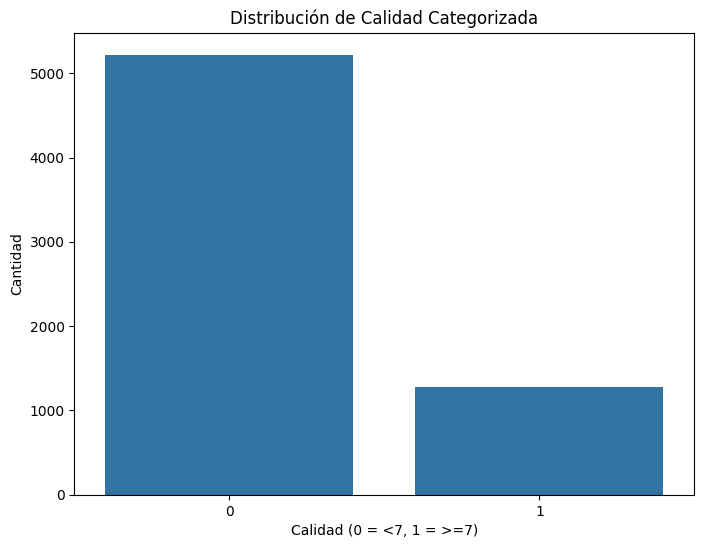


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1585
           1       0.57      0.49      0.53       365

    accuracy                           0.84      1950
   macro avg       0.73      0.70      0.72      1950
weighted avg       0.83      0.84      0.83      1950


Matriz de Confusión:
[[1451  134]
 [ 185  180]]

Precisión del modelo: 0.8364102564102565


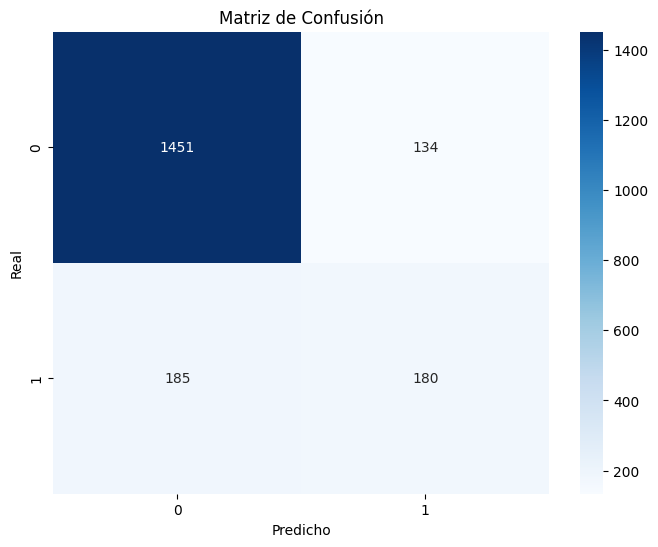

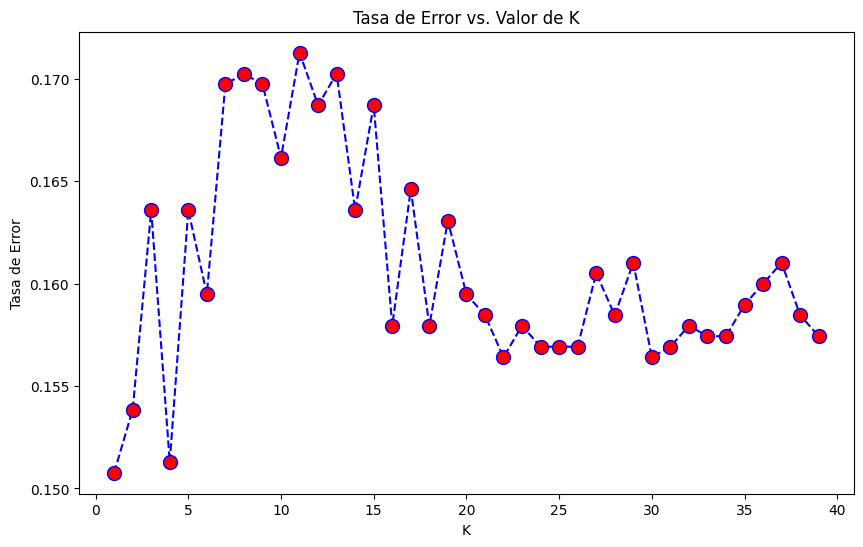

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np # Importing the numpy library


# Cargar los datos - CORRECCIÓN: Actualmente estás sobrescribiendo df con el segundo archivo
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Añadir una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets si deseas trabajar con todos los datos
df = pd.concat([df_red, df_white])

# Mostrar información básica
print("Información del dataset:")
print(df.info())

# Preprocesamiento
# Convertir la calidad en categorías binarias (por ejemplo, buena (1) si quality >= 7, mala (0) si no)
df['quality_category'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Visualizar la nueva distribución
plt.figure(figsize=(8, 6))
sns.countplot(x='quality_category', data=df)
plt.title('Distribución de Calidad Categorizada')
plt.xlabel('Calidad (0 = <7, 1 = >=7)')
plt.ylabel('Cantidad')
plt.show()

# Preparar datos para KNN
X = df.drop(['quality', 'quality_category', 'type'], axis=1)  # Eliminar columnas no predictoras
y = df['quality_category']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Opcional: Encontrar el mejor valor de k
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')
plt.show()